<a href="https://colab.research.google.com/github/mtenconi/Ceramic_Analysis/blob/main/image_analysis_of_ceramic_microscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
################################################################################
# 1. import notebooks
import cv2
import numpy as np

from google.colab import files
from IPython.display import Image

from google.colab.patches import cv2_imshow

# 2.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 3.
import scipy.ndimage

# 4.    ...
from skimage import data, io, filters, feature
from skimage.color import label2rgb
from skimage.filters import threshold_otsu, threshold_mean,try_all_threshold
from skimage.measure import label, regionprops,regionprops_table
from skimage.morphology import label, closing, square
from skimage.segmentation import clear_border

import matplotlib.patches as mpatches

import pandas as pd

In [204]:
################################################################################
# 2. upload files
uploaded = files.upload()

Saving cdp7_5x_138.JPG to cdp7_5x_138.JPG


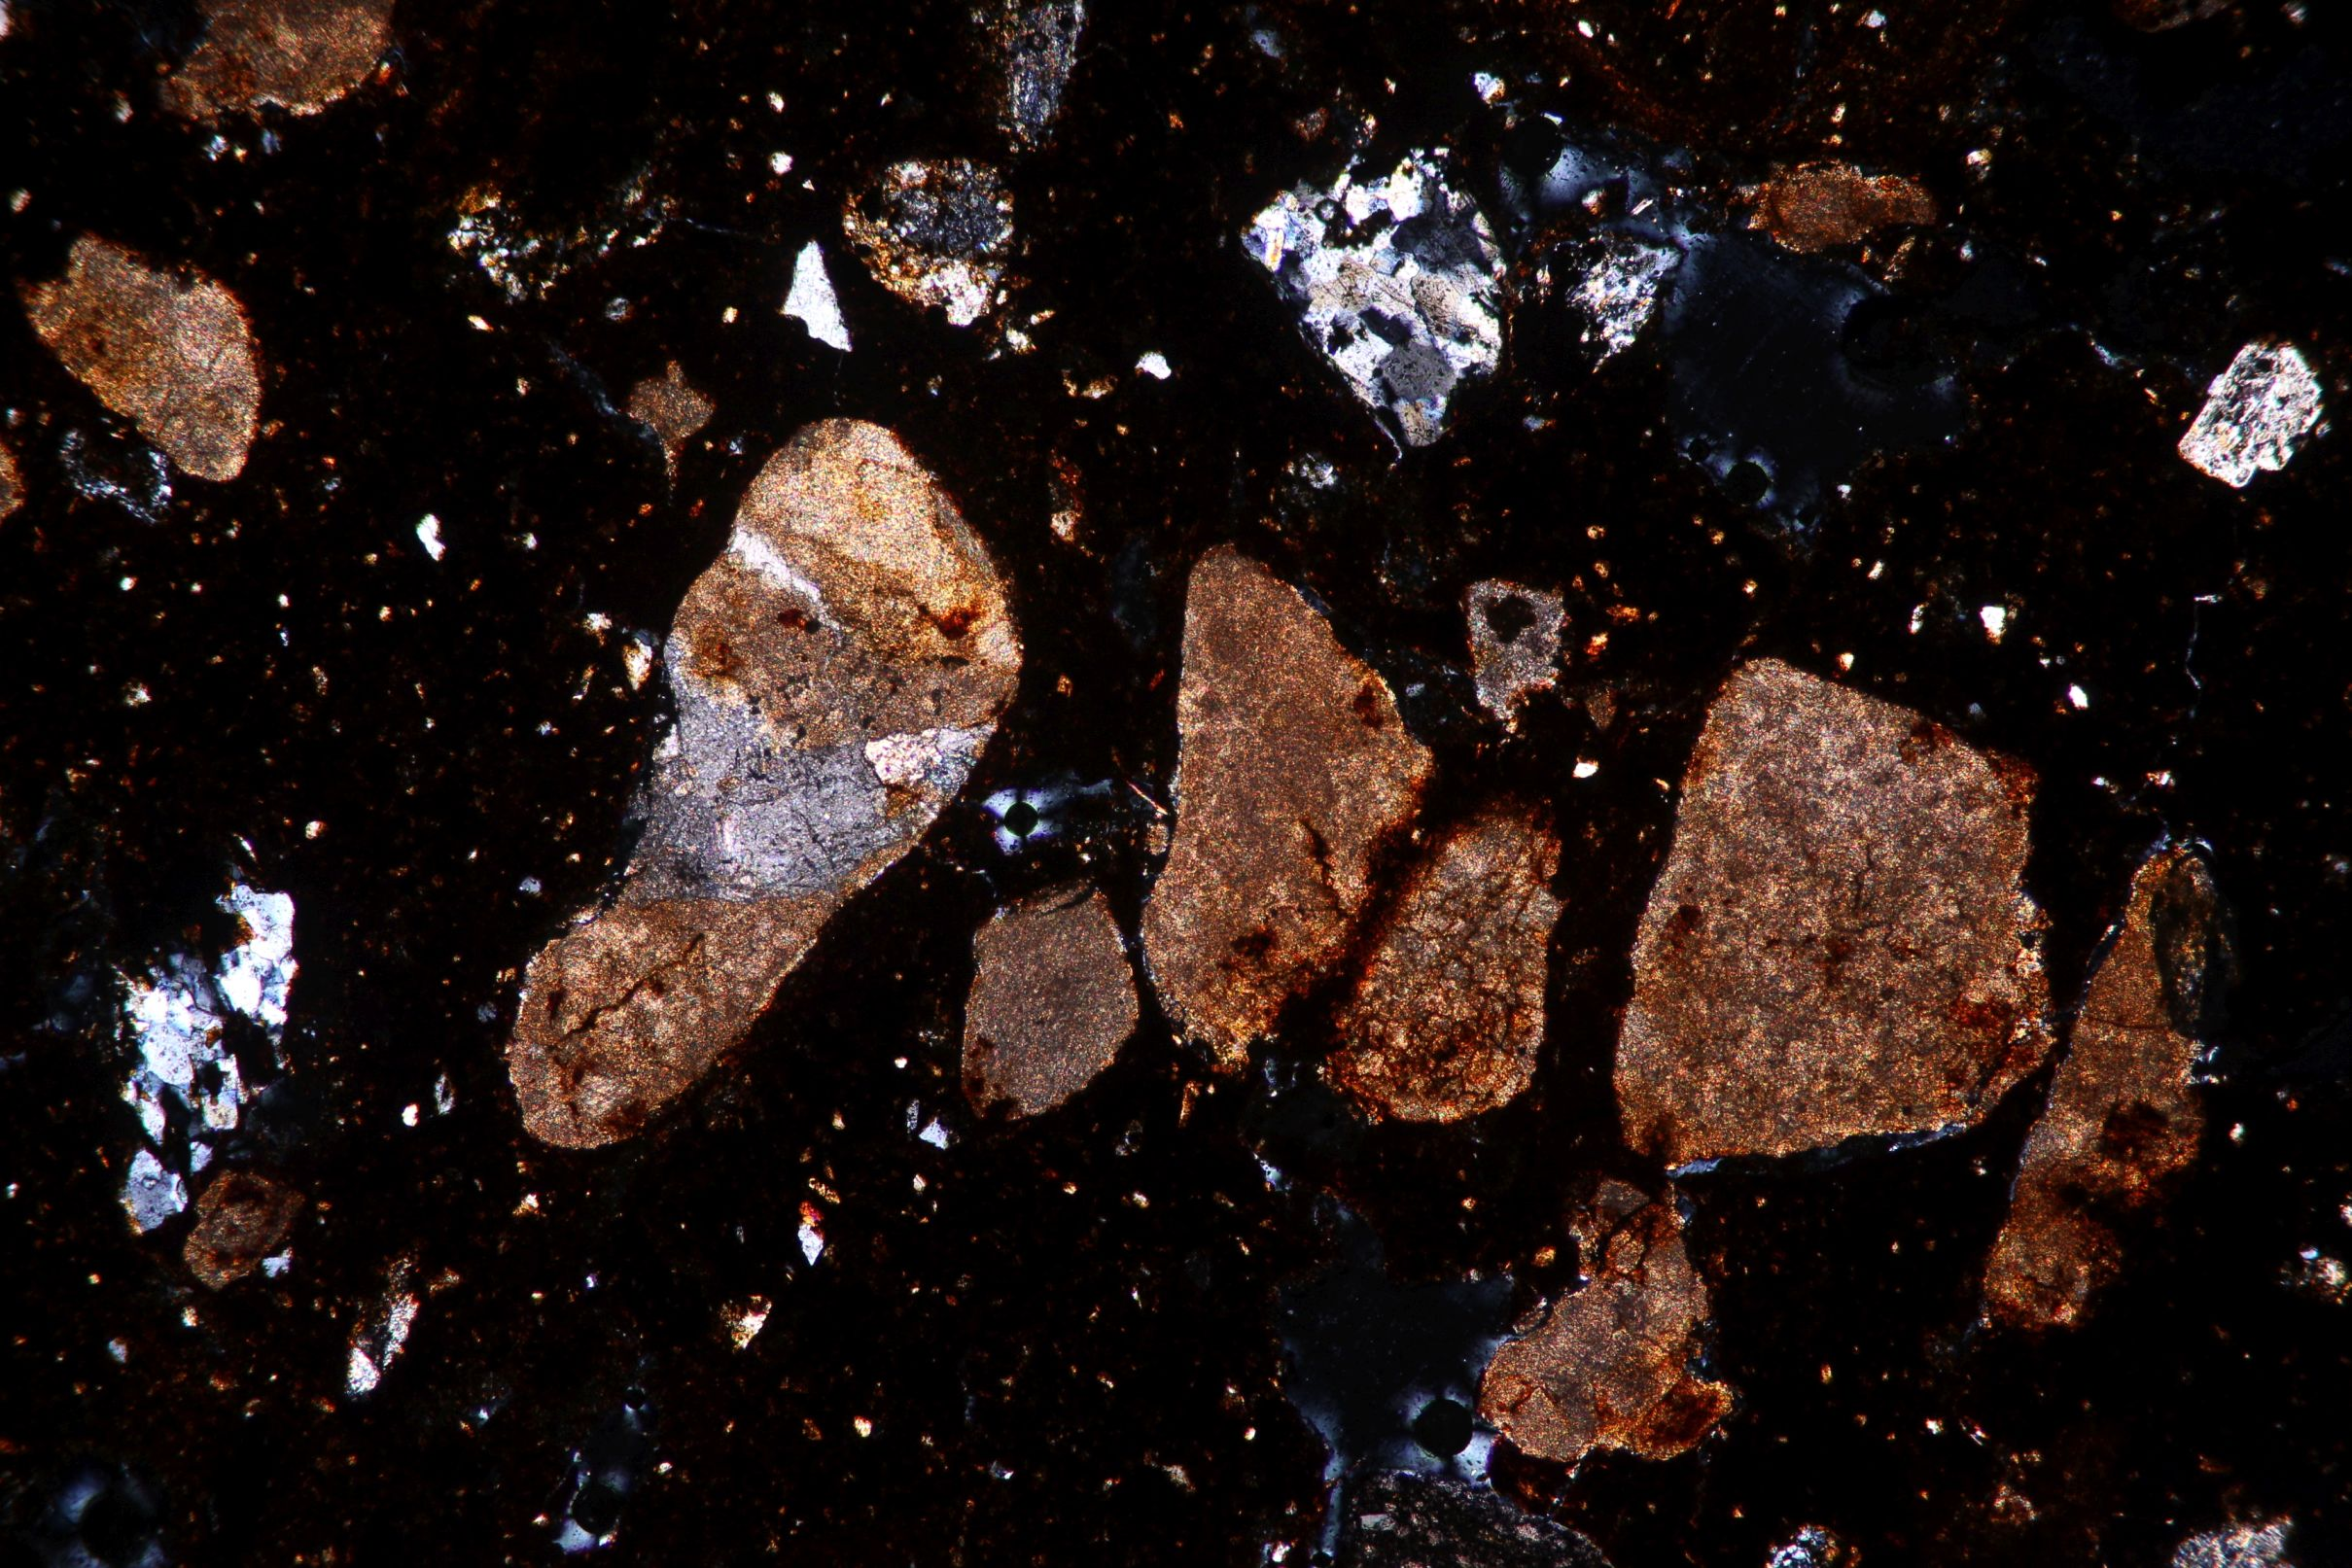

In [210]:
Image("cdp7_5x_138.JPG", width=600)

In [211]:
img_color = mpimg.imread("cdp7_5x_138.JPG")
# imgplot = plt.imshow(img_color)
# plt.show()

In [212]:
img_gray = cv2.imread("cdp7_5x_138.JPG", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img_gray, cmap="gray")
# plt.show()

In [213]:
################################################################################
# 3. Apply filters

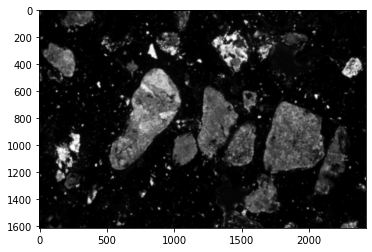

In [214]:
# Blurring/smoothing
# Gaussian filter from scipy.ndimage
img = scipy.ndimage.gaussian_filter(img_gray, sigma=3)

plt.imshow(img, cmap=plt.cm.gray)

In [215]:
################################################################################
# 4. segmentation

In [216]:
# fig, ax = try_all_threshold(img, figsize=(10, 10), verbose=False)
# plt.show()

In [225]:
# apply threshold: mean
im_th = threshold_mean(img)             # for inclusions, images taken in xp
#im_th = threshold_minimum(img)         # for voids calculation, images taken in ppl
im_th = threshold_otsu(img)            # for inclusions, images taken in xp

In [226]:
# clean image
bw = closing(img > im_th)

# plt.imshow(bw, cmap=plt.cm.gray)
# plt.show()

In [227]:
# remove artifacts connected to image border
im_th = clear_border(bw)

# plt.imshow(im_th, cmap="gray")
# plt.show()

In [220]:
################################################################################
# 5. label

Number of objects found: 438


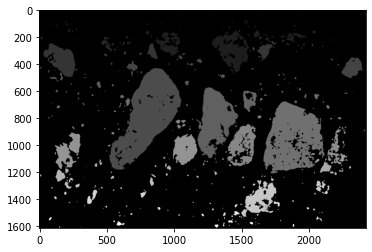

In [228]:
# label image regions    -   1
label_image, num_obj = label(im_th, return_num=True)
props = regionprops(label_image)
props_tb = regionprops_table(label_image, img, 
                             properties=['label', 'area', 'filled_area','perimeter', 'major_axis_length','minor_axis_length' ])
print("Number of objects found: %s" %num_obj)
plt.imshow(label_image, cmap="gray")
plt.show()

Number of objects found: 438


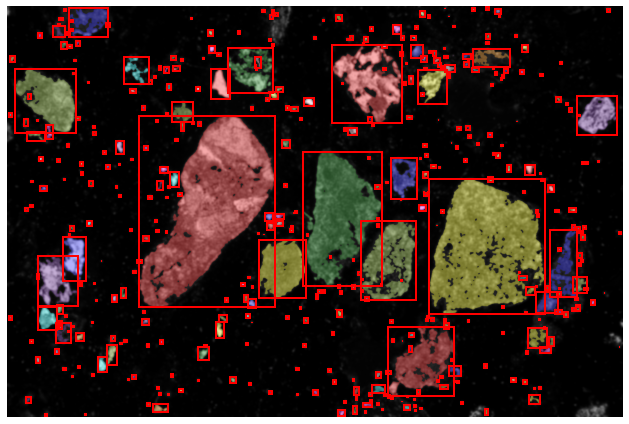

In [229]:
# Lable image  -  2

# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
label_image2 , num_obj = label(im_th, return_num=True)
print("Number of objects found: %s" %num_obj)
props2 = regionprops(label_image2)
props_tb2 = regionprops_table(label_image2, img, 
                              properties=['label', 'area', 'filled_area','perimeter', 'major_axis_length','minor_axis_length' ])

image_label_overlay = label2rgb(label_image2, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image2):
    # take regions with large enough areas
    # if ((region.bbox[2]-region.bbox[0])>sizeTh and (region.bbox[3] - region.bbox[1])>sizeTh):               # insert Th value
        #    region.area >= 1500:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [231]:
################################################################################
#Show largest regions location, image and edge

In [232]:
#Sort all found shapes by region size
sortRegions2 = [[(region.bbox[2]-region.bbox[0]) * (region.bbox[3] - region.bbox[1]),region.bbox] 
                for region in regionprops(label_image2) if
                ((region.bbox[2]-region.bbox[0])>5 and (region.bbox[3] - region.bbox[1])>5)]              # > 5 pixels
sortRegions2 = sorted(sortRegions2, reverse=True)

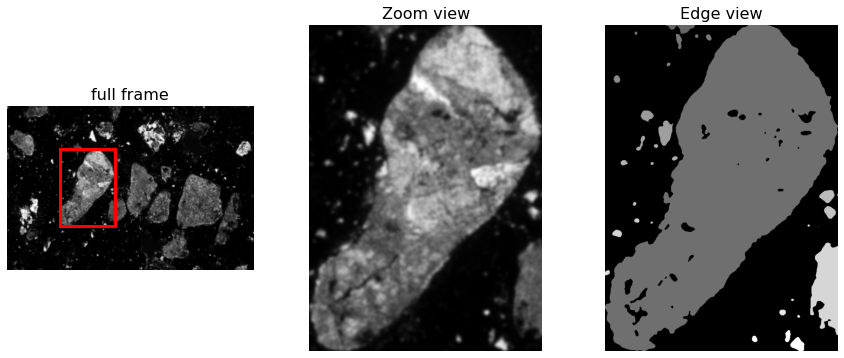

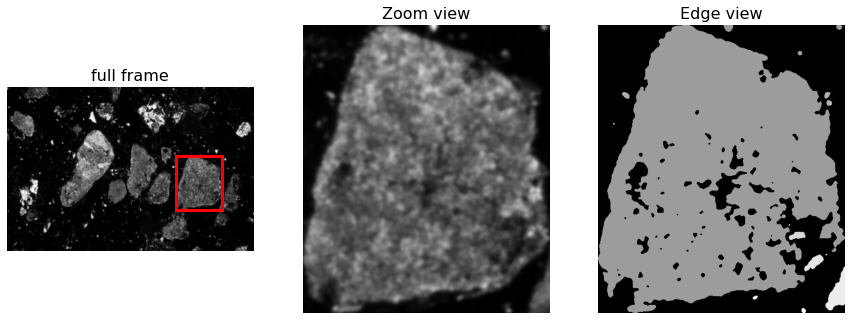

In [233]:
for region in sortRegions2[:2]:
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region[1]
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('full frame', fontsize=16)
    ax[0].axis('off')
    rect = mpatches.Rectangle((minc, minr),
                          maxc - minc,
                          maxr - minr,
                          fill=False,
                          edgecolor='red',
                          linewidth=3)
    ax[0].add_patch(rect)
    
    ax[1].imshow(img[minr:maxr,minc:maxc],cmap='gray')
    ax[1].set_title('Zoom view', fontsize=16)
    ax[1].axis("off")

    ax[2].imshow(label_image[minr:maxr,minc:maxc],cmap='gray')
    ax[2].set_title('Edge view', fontsize=16)
    ax[2].axis("off")
    plt.show()

In [234]:
################################################################################
# 6. Conversion rate

In [235]:
height, width, color = img.shape

ValueError: ignored

In [236]:
width, height = img_gray.shape

In [237]:
width

1613

In [238]:
mm_per_pixels = 5/width     # inserire lunghezza in mm dell'immagine
pixels_per_mm = width/5     # inserire lunghezza in mm dell'immagine

In [240]:
d = {'mm_per_pixels': [mm_per_pixels],
     'pixels_per_mm': [pixels_per_mm]}

pd.DataFrame(d)

,mm_per_pixels,pixels_per_mm
0,0.0031,322.6


In [241]:
################################################################################
# 7. Measure properties of labeled image regions and return them as table

In [242]:
props = regionprops(label_image)           # or label_image2

In [243]:
len(props)

438

In [244]:
props_tb = regionprops_table(label_image, img, 
                             properties=['label', 'area', 'filled_area','perimeter', 'major_axis_length','minor_axis_length'])

In [245]:
data = pd.DataFrame(props_tb)
data['aspect ratio'] = data['major_axis_length']/data['minor_axis_length']
data['roundness'] = data['minor_axis_length']/data['major_axis_length']

In [246]:
sort_by_area =   pd.DataFrame(data.sort_values('area', ascending=False))
# sort_by_area[sort_by_area['area'] > 1500].head()    # table with areas > X pixels (here)
# round(sort_by_area[sort_by_area['area'] > 1000],2).head()    # table with areas > X (here 1000 pixels)
round(sort_by_area,3).head()

,label,area,filled_area,perimeter,major_axis_length,minor_axis_length,aspect ratio,roundness
130,131,188753,193442,3822.416,829.033,325.439,2.547,0.393
192,193,153775,163476,5898.951,533.114,422.463,1.262,0.792
164,165,88915,89923,2513.804,498.909,259.498,1.923,0.520
50,51,41901,44426,2120.525,305.595,221.570,1.379,0.725
229,230,37309,45559,2859.924,326.376,194.473,1.678,0.596


In [247]:
# Conversion to mm:
data_mm =  pd.DataFrame(props_tb)
data_mm['aspect ratio'] = data_mm['major_axis_length']/data_mm['minor_axis_length']
data_mm['roundness'] = data_mm['minor_axis_length']/data_mm['major_axis_length']

#data_mm = data
data_mm.loc[:, data_mm.columns != 'label']*mm_per_pixels
data_mm[["area","filled_area"]] = mm_per_pixels * data_mm[["area","filled_area"]]  # area = *mm_per_pixels^2

In [248]:
sort_by_area_mm =   pd.DataFrame(data_mm.sort_values('area', ascending=False))
round(sort_by_area_mm,3).head()

,label,area,filled_area,perimeter,major_axis_length,minor_axis_length,aspect ratio,roundness
130,131,585.099,599.634,3822.416,829.033,325.439,2.547,0.393
192,193,476.674,506.745,5898.951,533.114,422.463,1.262,0.792
164,165,275.620,278.745,2513.804,498.909,259.498,1.923,0.520
50,51,129.885,137.712,2120.525,305.595,221.570,1.379,0.725
229,230,115.651,141.224,2859.924,326.376,194.473,1.678,0.596


In [251]:
round(min(data_mm.area),3), round(max(data_mm.area),3)    # min and max area in mm

(0.003, 585.099)

In [252]:
round(min(data.area),3), round(max(data.area),3)          # min and max area in pixels

(1, 188753)

In [253]:
# summary of data:
length = len(regionprops(label_image))                # particles count
tot_area = data["filled_area"].sum()                           # total particle area in pixels
tot_filled_area = data["filled_area"].sum()  * 100 /  (width * height)                                             # area fraction in percentage 
tot_filled_area_x100 = data["filled_area"].sum()  * 100 /  (width * height) 

# mean of all parameters:
mean_area = data["area"].mean()
mean_filled_area = data["filled_area"].mean()
mean_perimeter = data["perimeter"].mean()
mean_major_axis_length = data["major_axis_length"].mean()
mean_minor_axis_length = data["minor_axis_length"].mean()    


In [256]:
data_df = {'number of particles': [length],
           'tot area %': [tot_filled_area_x100],
           'mean area': [mean_filled_area],
           'mean major axis': [mean_major_axis_length],
           'mean minor axis': [mean_minor_axis_length]
           }

print("Summary of data (pixels):")
data_df = pd.DataFrame (data_df, columns = ['number of particles','tot area %','mean area', 'mean major axis','mean minor axis'])
print (round(data_df))

Summary of data (pixels):
   number of particles  tot area %  mean area  mean major axis  mean minor axis
0                  438        21.0     1884.0             28.0             17.0


In [257]:
# summary of data in mm:
length_mm = len(regionprops(label_image))                # particles count
data["filled_area"].sum() * mm_per_pixels * mm_per_pixels                          # total particle area in pixels
tot_filled_area_x100_mm = data["filled_area"].sum()  * 100 /  (width * height)                                             # area fraction in percentage 

# mean of all parameters:
data["area"].mean() * mm_per_pixels  * mm_per_pixels
mean_filled_area_mm = data["filled_area"].mean()  * mm_per_pixels  * mm_per_pixels
data["perimeter"].mean()  * mm_per_pixels 
mean_major_axis_length_mm = data["major_axis_length"].mean()  * mm_per_pixels
mean_minor_axis_length_mm = data["minor_axis_length"].mean() * mm_per_pixels

In [258]:
data_df = {'number of particles': [length_mm],
           'tot area %': [tot_filled_area_x100_mm],
           'mean area': [mean_filled_area_mm],
           'mean major axis': [mean_major_axis_length_mm],
           'mean minor axis': [mean_minor_axis_length_mm]
           }

print("Summary of data (pixels):")
data_df = pd.DataFrame (data_df, columns = ['number of particles','tot area %','mean area', 'mean major axis','mean minor axis'])
print (round(data_df))

Summary of data (pixels):
   number of particles  tot area %  mean area  mean major axis  mean minor axis
0                  438        21.0        0.0              0.0              0.0


In [259]:
from skimage.filters import threshold_otsu, threshold_mean, threshold_isodata, threshold_li, threshold_local
from skimage.filters import threshold_minimum, threshold_multiotsu, threshold_niblack, threshold_otsu
from skimage.filters import threshold_sauvola, threshold_triangle, threshold_yen

In [260]:
# apply threshold: all
otsu = threshold_otsu(img)
mean = threshold_mean(img)
isodata = threshold_isodata(img)
li = threshold_li(img)
minimum = threshold_minimum(img)
multiotsu = threshold_multiotsu(img)
niblack = threshold_niblack(img)
sauvola = threshold_sauvola(img)
triangle = threshold_triangle(img)
yen = threshold_yen(img)

In [261]:
# clean image
bw_otsu = closing(img > otsu)
bw_mean = closing(img > mean)
bw_isodata = closing(img > isodata)
bw_li = closing(img > li)
bw_minimum = closing(img > minimum)
bw_niblack = closing(img > niblack)
bw_sauvola = closing(img > sauvola)
bw_triangle = closing(img > triangle)
bw_yen = closing(img > yen)

In [262]:
# remove artifacts connected to image border
im_th_otsu = clear_border(bw_otsu)
im_th_mean = clear_border(bw_mean)
im_th_isodata = clear_border(bw_isodata)
im_th_li = clear_border(bw_li)
im_th_minimum = clear_border(bw_minimum)
im_th_niblack = clear_border(bw_niblack)
im_th_sauvola = clear_border(bw_sauvola)
im_th_triangle = clear_border(bw_triangle)
im_th_yen = clear_border(bw_yen)

otsu: Number of objects found: 438


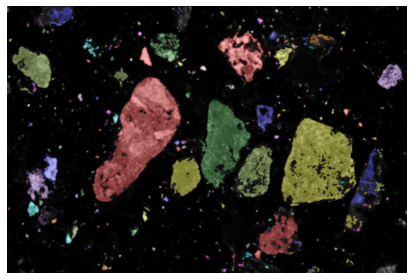

mean: Number of objects found: 580


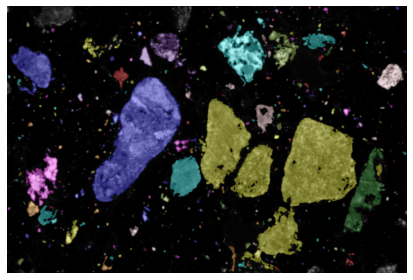

isodata: Number of objects found: 438


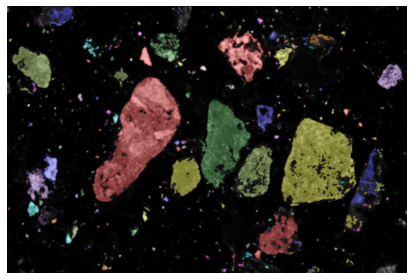

li: Number of objects found: 580


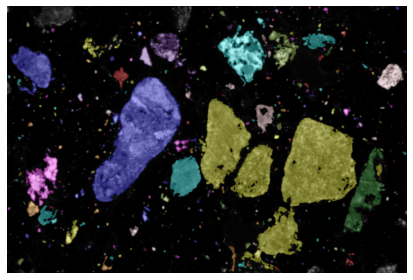

min: Number of objects found: 454


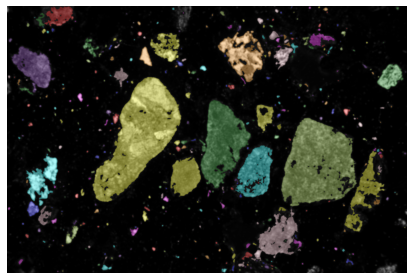

niblack: Number of objects found: 3716


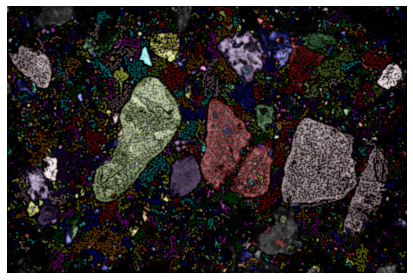

sauvola: Number of objects found: 2255


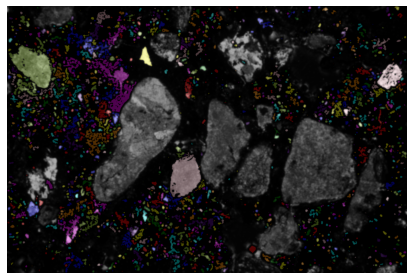

triangle: Number of objects found: 827


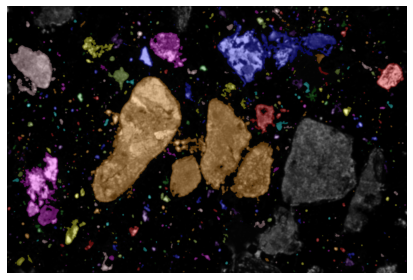

yen: Number of objects found: 351


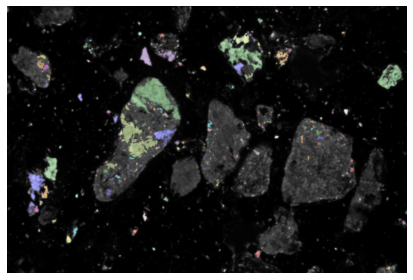

In [263]:
# label image regions    -   1
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
label_image_otsu, num_obj = label(im_th_otsu, return_num=True)
print("otsu: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_otsu, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_mean, num_obj = label(im_th_mean, return_num=True)
print("mean: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_mean, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_isodata, num_obj = label(im_th_isodata, return_num=True)
print("isodata: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_isodata, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_li, num_obj = label(im_th_li, return_num=True)
print("li: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_li, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_minimum, num_obj = label(im_th_minimum, return_num=True)
print("min: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_minimum, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_niblack, num_obj = label(im_th_niblack, return_num=True)
print("niblack: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_niblack, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_sauvola, num_obj = label(im_th_sauvola, return_num=True)
print("sauvola: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_sauvola, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_triangle, num_obj = label(im_th_triangle, return_num=True)
print("triangle: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_triangle, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

label_image_yen, num_obj = label(im_th_yen, return_num=True)
print("yen: Number of objects found: %s" %num_obj)
image_label_overlay = label2rgb(label_image_yen, image=img, bg_label=0)
fig, ax = plt.subplots(figsize=(10/1.5, 6/1.5))
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [264]:
len_li = len(regionprops(label_image_li))
len_otsu = len(regionprops(label_image_otsu))
len_mean = len(regionprops(label_image_mean))
len_isodata = len(regionprops(label_image_isodata))
len_minimum = len(regionprops(label_image_minimum))
len_niblack = len(regionprops(label_image_niblack))
len_sauvola = len(regionprops(label_image_sauvola))
len_triangle = len(regionprops(label_image_triangle))
len_yen = len(regionprops(label_image_yen))


data = {'type':  ['li', 'otsu', 'mean', 'isodata', 'minimum', 'niblack', 'sauvola', 'triangle', 'yen'],
        'Number of objects found:': [len_li, len_otsu, len_mean, len_isodata, len_minimum, len_niblack, len_sauvola, len_triangle, len_yen]
        }
df = pd.DataFrame (data, columns = ['type','Number of objects found:'])
print (df)

       type  Number of objects found:
0        li                       580
1      otsu                       438
2      mean                       580
3   isodata                       438
4   minimum                       454
5   niblack                      3716
6   sauvola                      2255
7  triangle                       827
8       yen                       351
